# Predicting Chronic Kidney Disease

## Load Libraries/Packages

In [1]:
#code from Myna (2017) https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# code from Myna (2017) https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/notebook
def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

## Import dataset

In [3]:
# dataset taken from Myna (2017) https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/data
df =pd.read_csv('C:/Users/maria/OneDrive/Practicum 2 MSDS 696/Project2/kidney_disease.csv')

## Exploratory Data Analysis/Data Cleansing

Examine the dataset.

The description of the Chronic_Kidney_Disease Data Set was taken from the UCI Machine Learning Repository (2015).  It contains 2 months of data on hospitalized patients.  This data set contains 24 independent variables and one dependant variable whichis the presence or absence of Chronic Kidney disease.  I added whether the feature was from a urine sample or blood serum.  The definition for each feature is listed below:
Attribute Information :
    1. Age(numerical)
        age in years
    2. Blood Pressure(numerical)
        bp in mm/Hg
    3. Specific Gravity(nominal) of urine
	  	sg - (1.005,1.010,1.015,1.020,1.025)
	4. Albumin(nominal) on urine dipstick
		al - (0,1,2,3,4,5)
 	5. Sugar(nominal) on urine dipstick
		su - (0,1,2,3,4,5)
 	6. Red Blood Cells(nominal) in urine
		rbc - (normal,abnormal)
 	7. Pus Cell (nominal) in urine
		pc - (normal,abnormal)
 	8. Pus Cell clumps(nominal) in urine
		pcc - (present,notpresent)
 	9. Bacteria(nominal) in urine
		ba  - (present,notpresent)
 	10. Blood Glucose Random(numerical) serum		
		bgr in mgs/dl
 	11. Blood Urea(numerical) serum	
		bu in mgs/dl
 	12. Serum Creatinine(numerical)	serum
		sc in mgs/dl
 	13. Sodium(numerical) serum
		sod in mEq/L
 	14. Potassium(numerical) serum	
		pot in mEq/L
 	15. Hemoglobin(numerical) serum
		hemo in gms
 	16. Packed  Cell Volume(numerical) serum
 	17. White Blood Cell Count(numerical) serum
		wc in cells/cumm
 	18. Red Blood Cell Count(numerical)	serum
		rc in millions/cmm
 	19. Hypertension(nominal) 	
		htn - (yes,no)
 	20. Diabetes Mellitus(nominal) 	
		dm - (yes,no)
 	21. Coronary Artery Disease(nominal)
		cad - (yes,no)
 	22. Appetite(nominal)	
		appet - (good,poor)
 	23. Pedal Edema(nominal)
		pe - (yes,no)	
 	24. Anemia(nominal)
		ane - (yes,no)
 	25. Class (nominal)		
		class - (ckd,notckd)


In [4]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [5]:
# preserve the original dataframe
df_original = df

In [6]:
df_original.head() 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
# examine the shape of the data set.
print(df.shape)

(400, 26)


In [9]:
df.index

RangeIndex(start=0, stop=400, step=1)

In [10]:
# examine the column headers
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

The dataframe contains the correct headers, however the first and second columns are both indexes.  I removed column 1.  Change nominal features to numeric.  

In [11]:
# Map text to 1/0 and do some cleaning, code from Myna (2017) https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/data
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'classif'},inplace=True)

In [12]:
# Further cleaning, code from Myna (2017)
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

In [13]:
# change headers to my sensical names
df.columns = ['age', 'bp', 'ua_spGr', 'ua_alb', 'ua_sug', 'ua_rbc', 'ua_pus', 'ua_pus_clum', 'ua_bact', 'gluc', 'bun', 'creat', 'Na', 'K', 'Hgb', 'pcv', 'wbc', 'rbc', 'htn', 'dm', 'cad', 'appet', 'edema', 'anemia', 'classif' ]

In [14]:
df.head()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,...,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [15]:
# examine the information on each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age            391 non-null float64
bp             388 non-null float64
ua_spGr        353 non-null float64
ua_alb         354 non-null float64
ua_sug         351 non-null float64
ua_rbc         248 non-null float64
ua_pus         335 non-null float64
ua_pus_clum    396 non-null float64
ua_bact        396 non-null float64
gluc           356 non-null float64
bun            381 non-null float64
creat          383 non-null float64
Na             313 non-null float64
K              312 non-null float64
Hgb            348 non-null float64
pcv            330 non-null object
wbc            295 non-null object
rbc            270 non-null object
htn            398 non-null float64
dm             398 non-null float64
cad            398 non-null float64
appet          399 non-null float64
edema          399 non-null float64
anemia         399 non-null float64
classif        400 non-null float6

In [16]:
# examine the summary statistics on each feature
df.describe(include = 'all')

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,...,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,330,295,270,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44,92,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41,9800,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21,11,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,NaN,NaN,NaN,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,NaN,NaN,NaN,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000


### Age feature

In [17]:
# examine the age feature
df.age.describe()

count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A4B9CAE80>]],
      dtype=object)

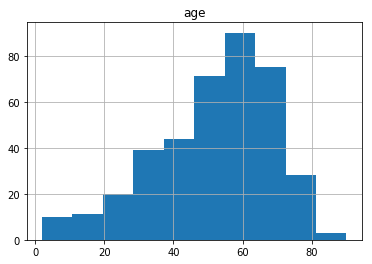

In [18]:
df.hist(column='age', bins=10)

In [19]:
df.age.mode()

0    60.0
dtype: float64

The age range is from 1 to 90 with the mode at 60 years of age.  One value of interest is the minimal age of 2.  There is no information from the UCI website further explaining why this value is included or how the data was collected.  This value of 2 could represent an error in data collection or could represent a child.  There are several pediatric etiologies which could lead to chronic kidney disease such as inflammatory disorders such as lupus, urinary tract infections, obstructive uropathy etc.  The row with the age of 2 was called to see if there were any clues an to whether this was an error or a child.

In [20]:
# examine the row with the unusual minimal value of 2.  Code from Rood (2018).
df.loc[df['age'] == 2]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,...,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
215,2.0,NaN,1.01,3.0,0.0,0.0,1.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [21]:
# examine age column for other young ages
df.age.value_counts()

60.0    19
65.0    17
48.0    12
50.0    12
55.0    12
47.0    11
62.0    10
45.0    10
54.0    10
59.0    10
56.0    10
70.0     9
34.0     9
61.0     9
46.0     9
68.0     8
73.0     8
71.0     8
64.0     8
57.0     8
63.0     7
30.0     7
72.0     7
67.0     7
69.0     6
35.0     6
33.0     6
44.0     6
42.0     6
43.0     6
        ..
32.0     3
17.0     3
25.0     3
8.0      3
29.0     3
21.0     2
5.0      2
49.0     2
15.0     2
28.0     2
12.0     2
20.0     2
36.0     2
19.0     2
82.0     1
7.0      1
2.0      1
78.0     1
90.0     1
3.0      1
6.0      1
11.0     1
4.0      1
83.0     1
27.0     1
14.0     1
81.0     1
22.0     1
26.0     1
79.0     1
Name: age, Length: 76, dtype: int64

There are other ages which represent children, so will leave those in the dataset.

### BP feature

The description of the bp feature does not explain if the bp data is a systolic, diastolic or mean blood pressure reading.  The majority of the values are typical of mean blood pressure readings except for the outliers to the right of the histogram.

In [22]:
df.bp.describe()

count    388.000000
mean      76.469072
std       13.683637
min       50.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      180.000000
Name: bp, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A4BAB9400>]],
      dtype=object)

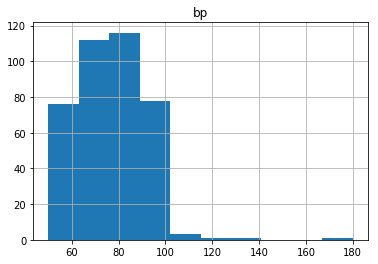

In [23]:
df.hist(column='bp')

### Specific Gravity feature

According to  Ghadban (2014), "Urinary specific gravity is a measure of the concentration of solutes in the urine and provides information on the kidney’s ability to concentrate urine."  The concentration of urine changes with certain etiologies.  Although there is no detailed description of this measurement, it appears to be based on the categories on a urine dipstick.  The normal range for this test is 1.010 to 1.030 (Wikipedia, 2018).

In [24]:
df.ua_spGr.describe()

count    353.000000
mean       1.017408
std        0.005717
min        1.005000
25%        1.010000
50%        1.020000
75%        1.020000
max        1.025000
Name: ua_spGr, dtype: float64

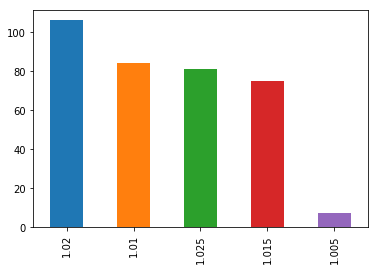

In [25]:
df.ua_spGr.value_counts().plot(kind='bar')

In [26]:
df.ua_spGr.value_counts()

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: ua_spGr, dtype: int64

The only value which maybe abnormal by some labs is the 1.005, which is more diluted urine.

### Urine Albumin feature

In [27]:
df.ua_alb.describe()

count    354.000000
mean       1.016949
std        1.352679
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: ua_alb, dtype: float64

In [28]:
df.ua_alb.value_counts()

0.0    199
1.0     44
3.0     43
2.0     43
4.0     24
5.0      1
Name: ua_alb, dtype: int64

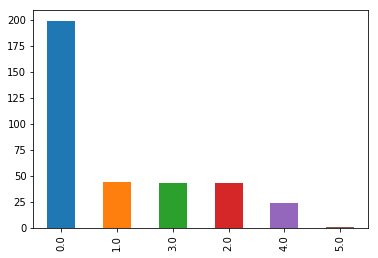

In [29]:
df.ua_alb.value_counts().plot(kind='bar')

Most of the values were zero which represents a normal level of albumin in the urine

### Urine Sugar feature

In [30]:
df.ua_sug.describe()

count    351.000000
mean       0.450142
std        1.099191
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        5.000000
Name: ua_sug, dtype: float64

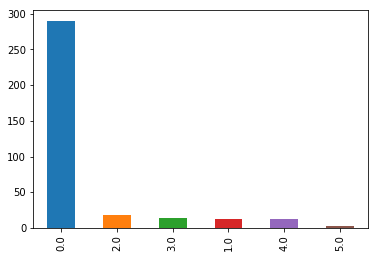

In [31]:
df.ua_sug.value_counts().plot(kind='bar')

The majority of the data set had no sugar in urine, which is normal.

### Urine Red Blood Cell feature

In [32]:
df.ua_rbc.describe()

count    248.000000
mean       0.189516
std        0.392711
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ua_rbc, dtype: float64

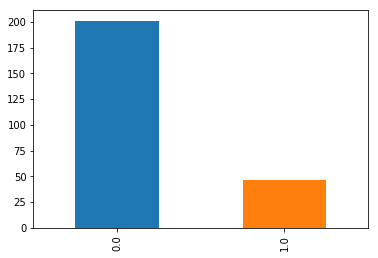

In [33]:
df.ua_rbc.value_counts().plot(kind='bar')

Most of the instances contain a normal rbc result in the urine

### Urine Pus feature

In [34]:
df.ua_pus.describe()

count    335.000000
mean       0.226866
std        0.419431
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ua_pus, dtype: float64

In [35]:
df.ua_pus.value_counts()

0.0    259
1.0     76
Name: ua_pus, dtype: int64

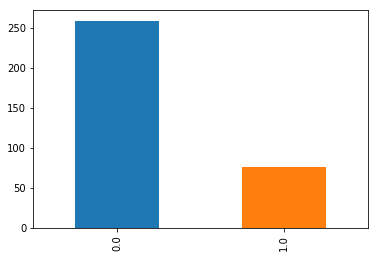

In [36]:
df.ua_pus.value_counts().plot(kind='bar')

A majority of the samples had a normal result for red blood cells in the urine.

### Urine Pus Clumps feature

In [37]:
df.ua_pus_clum.value_counts()

0.0    354
1.0     42
Name: ua_pus_clum, dtype: int64

Most of the examples did not have pus clumps present in the urine.

### Urine Bacteria feature

In [38]:
df.ua_bact.value_counts()

0.0    374
1.0     22
Name: ua_bact, dtype: int64

In [39]:
# To examine the percent for each category
df.ua_bact.value_counts()/len(df)*100

0.0    93.5
1.0     5.5
Name: ua_bact, dtype: float64

5.5% of the examples had bacteria in the urine.

### Blood Glucose feature

In [40]:
df.gluc.describe()

count    356.000000
mean     148.036517
std       79.281714
min       22.000000
25%       99.000000
50%      121.000000
75%      163.000000
max      490.000000
Name: gluc, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A4BE11E10>]],
      dtype=object)

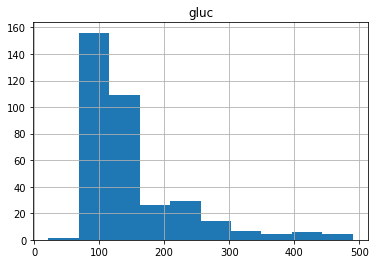

In [41]:
df.hist(column='gluc')

Most of the examples had a normal glucose level.  There is a minimum value of 22, which could be a valid number for this test.

### Blood Urea Nitrogen feature

The blood urea nitrogen test is used to evaluate kidney function along with the creatinine test. According to the Mayo Clinic, the normal range for the BUN is around 7 mgs/dl to 20 mgs/dl.  The highter the value the worse the kidney function as the the kidneys are not able to filter out the urea nitrogen from the blood.

In [42]:
df.bun.describe()

count    381.000000
mean      57.425722
std       50.503006
min        1.500000
25%       27.000000
50%       42.000000
75%       66.000000
max      391.000000
Name: bun, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A4BE11DD8>]],
      dtype=object)

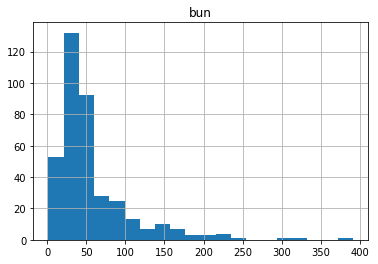

In [43]:
df.hist(column="bun", bins=20)

Need to find the numer of examples with a normal level.

Most of the examples had an elevated BUN level.  The max level of 300 and 391 are unusually high.

### Creatinine feature

Creatinine is a chemical that comes from the breakdown of protein in the body.  It is also considered a waste product of metabolism  and is usually present in small amounts in the blood.  According to Davis & Shiel () the normal level of blood creatinine is 0.6 to 1.2 mg/dL.  The higher the value the worse the kidney function.

In [44]:
df.creat.describe()

count    383.000000
mean       3.072454
std        5.741126
min        0.400000
25%        0.900000
50%        1.300000
75%        2.800000
max       76.000000
Name: creat, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A4BEF5358>]],
      dtype=object)

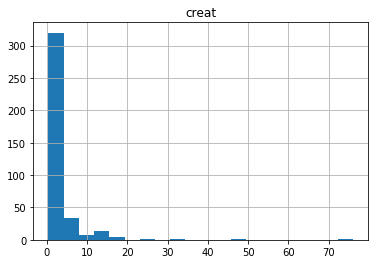

In [45]:
df.hist(column="creat", bins = 20)

need to improve this chart.  Find the number of examples with a normal creat.  The number of 76 is unusual

### Sodium feature

This feature is the value of sodium in the blood.  The normal range is 135 - 145 mg2/dl.

In [46]:
df.Na.describe()

count    313.000000
mean     137.528754
std       10.408752
min        4.500000
25%      135.000000
50%      138.000000
75%      142.000000
max      163.000000
Name: Na, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A4BDDDB00>]],
      dtype=object)

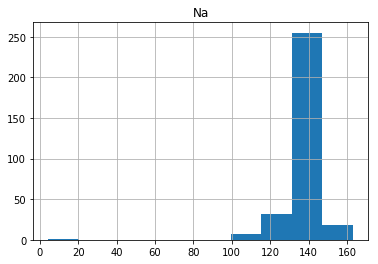

In [47]:
df.hist(column="Na", bins = 10)

Most of the examples had a normal serum sodium level.  The minimal value of 4.5 is unusually low and maybe an error.

In [48]:
df.loc[df['Na'] == 4.5]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,...,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
21,60.0,90.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,32,6200,3.6,1.0,1.0,1.0,1.0,0.0,0.0,1.0


### Potassium feature

The normal range for serum potassium (which is an electrolyte) is 3.5 - 5.5 mEq/L.  Levels above 6 are critical and can alter the electrical conduction of the heart to life threatening arrhythmias.

In [49]:
df.K.describe()

count    312.000000
mean       4.627244
std        3.193904
min        2.500000
25%        3.800000
50%        4.400000
75%        4.900000
max       47.000000
Name: K, dtype: float64

In [50]:
df.K.value_counts()

5.0     30
3.5     30
4.9     27
4.7     17
4.8     16
4.1     14
4.2     14
4.4     14
4.0     14
3.8     14
3.9     14
4.5     13
4.3     12
3.7     12
3.6      8
4.6      7
3.4      5
5.2      5
5.7      4
5.3      4
5.5      3
5.4      3
3.2      3
6.3      3
2.9      3
3.3      3
3.0      2
6.5      2
5.9      2
2.5      2
5.8      2
5.6      2
2.7      1
7.6      1
47.0     1
6.4      1
2.8      1
39.0     1
5.1      1
6.6      1
Name: K, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A4BFA4400>]],
      dtype=object)

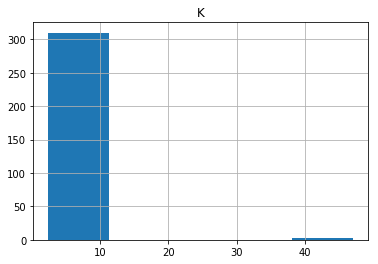

In [51]:
df.hist(column="K", bins = 5,)

Most of the examples had a normal serum potassium level.  The values of 39 and 47.0 are most likely errors as these values are not valid numbers for this test and incompatabile with life. The values should probably be 4.7 and 3.9 and I will correct these.

In [52]:
df.loc[df['K'] == 39]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,...,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
61,67.0,80.0,1.01,1.0,3.0,0.0,1.0,0.0,0.0,182.0,...,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [53]:
df['K'] = df['K'].replace([39], 3.9)

In [54]:
df['K'] = df['K'].replace([47], 4.7)

In [55]:
df.loc[df['K'] == 39]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,...,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif


In [56]:
df.K.value_counts()

3.5    30
5.0    30
4.9    27
4.7    18
4.8    16
3.9    15
4.4    14
4.2    14
4.1    14
3.8    14
4.0    14
4.5    13
3.7    12
4.3    12
3.6     8
4.6     7
3.4     5
5.2     5
5.3     4
5.7     4
5.5     3
5.4     3
3.2     3
3.3     3
2.9     3
6.3     3
5.6     2
5.8     2
6.5     2
3.0     2
5.9     2
2.5     2
6.6     1
7.6     1
5.1     1
2.8     1
2.7     1
6.4     1
Name: K, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A4B96C518>]],
      dtype=object)

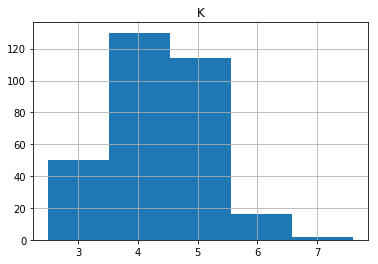

In [57]:
df.hist(column="K", bins = 5,)

The above histogram provides a more accurate distribution after correcting the erroneous values for the potassium.

### Hemoglobin (Hgb) feature

The hemoglobin is a measure of red blood cell count.  According to the Mayo Clinic, "The normal range for hemoglobin in men is 13.5 to 17.5 grams per deciliter and for women it is 12.0 to 15.5 grams per deciliter.  The normal range vary with gender and age.

In [58]:
df.Hgb.describe()

count    348.000000
mean      12.526437
std        2.912587
min        3.100000
25%       10.300000
50%       12.650000
75%       15.000000
max       17.800000
Name: Hgb, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A4C1000F0>]],
      dtype=object)

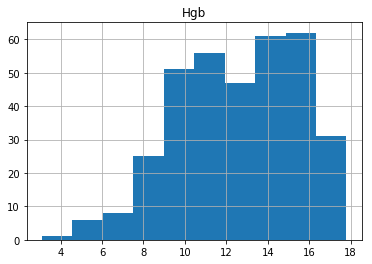

In [59]:
df.hist(column='Hgb')

Find the percentage of examples with normal hemoglobin level

### Packed Cell Volume (pcv) feature

 According to Hematocrit (n.d.) the packed cell volume is another name for the hematocrit and "is the volume percentage (vol%) of red blood cells in blood. It is normally 47% +-5% for men and 42% +-5% for women."

In [60]:
df.pcv.describe()

count     330
unique     44
top        41
freq       21
Name: pcv, dtype: object

In [61]:
# may need to change type to numeric.
# df.hist(column='pcv')

### White Blood Cell Count  (WBC) feature

In [62]:
# may need to change type to numeric
df.wbc.describe()

count      295
unique      92
top       9800
freq        11
Name: wbc, dtype: object

In [63]:
df.wbc.value_counts()

9800      11
6700      10
9200       9
7200       9
9600       9
11000      8
6900       8
5800       8
7800       7
7000       7
9100       7
9400       7
4300       6
6300       6
10700      6
10500      6
7500       5
10200      5
7900       5
8600       5
8100       5
9500       5
5600       5
8300       5
5000       5
6000       4
4700       4
6200       4
10400      4
6800       4
          ..
5900       1
15700      1
18900      1
9900       1
10800      1
12700      1
9700       1
21600      1
5100       1
11500      1
12300      1
4100       1
\t8400     1
16700      1
10900      1
11300      1
12100      1
13600      1
11900      1
14900      1
12200      1
11800      1
26400      1
12000      1
2600       1
19100      1
4900       1
11200      1
\t?        1
\t6200     1
Name: wbc, Length: 92, dtype: int64

There are 2 values that look invalid, they are /t8400 and /t6200.

In [64]:
df.loc[df['wbc'] == '\t6200']

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,...,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
76,48.0,80.0,1.005,4.0,0.0,1.0,1.0,0.0,1.0,133.0,...,36,\t6200,4,0.0,1.0,0.0,1.0,1.0,0.0,1.0


In [65]:
pd.set_option('display.max_rows', 500)

In [66]:
df['wbc']

0        7800
1        6000
2        7500
3        6700
4        7300
5        7800
6         NaN
7        6900
8        9600
9       12100
10        NaN
11       4500
12      12200
13        NaN
14      11000
15       3800
16        NaN
17        NaN
18      11400
19       5300
20       9200
21       6200
22       6900
23        NaN
24       8300
25       8400
26      10300
27       9600
28        NaN
29        NaN
30        NaN
31       7800
32       9600
33        NaN
34        NaN
35       9800
36        NaN
37       6900
38        NaN
39       9800
40       9100
41        NaN
42       9200
43       7900
44        NaN
45        NaN
46       6400
47       8600
48      18900
49      21600
50      11000
51        NaN
52       4300
53       8500
54       9800
55        NaN
56      11300
57        NaN
58       7200
59        NaN
60        NaN
61        NaN
62       7700
63        NaN
64        NaN
65        NaN
66        NaN
67        NaN
68        NaN
69       6900
70       8300
71    

In [67]:
# remove /t from some wbc values, code from McKinney (2012)
df['wbc'] = df['wbc'].str.lstrip('\t')

In [68]:
df.wbc.value_counts()

9800     11
6700     10
7200      9
9600      9
9200      9
5800      8
6900      8
11000     8
7000      7
9400      7
7800      7
9100      7
10700     6
4300      6
10500     6
6300      6
8600      5
10200     5
7500      5
7900      5
6200      5
5000      5
8100      5
8300      5
5600      5
9500      5
7700      4
5500      4
6800      4
8400      4
6000      4
4700      4
10400     4
10300     4
6500      4
4500      3
8000      3
6400      3
4200      3
7300      3
7400      3
5400      3
15200     2
6600      2
5300      2
5700      2
9300      2
13200     2
8800      2
7100      2
12800     2
9000      2
3800      2
11400     2
12400     2
8500      2
8200      2
14600     2
12500     1
9900      1
5900      1
15700     1
5200      1
2200      1
16300     1
18900     1
12700     1
21600     1
5100      1
11500     1
12300     1
4100      1
16700     1
10900     1
11300     1
12100     1
13600     1
?         1
11900     1
14900     1
12200     1
11800     1
26400     1
1200

In [69]:
# repace ? with NaN
df = df.replace('?', np.NaN)

In [70]:
# df.wbc.value_counts()

### Red Blood Cell (rbc) feature

In [71]:
# may need to change type to numeric type?
df.rbc.describe()

count     270
unique     46
top       5.2
freq       18
Name: rbc, dtype: object

In [72]:
df.rbc.value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
5      10
4.8    10
3.9    10
4.6     9
3.4     9
5.9     8
6.1     8
3.7     8
5.5     8
3.8     7
5.8     7
5.3     7
5.4     7
4.2     6
5.6     6
4.3     6
4       6
6.2     5
5.7     5
4.1     5
6.5     5
4.4     5
6.4     5
5.1     5
3.2     5
6.3     4
6       4
3.6     4
3.5     3
3.3     3
3       3
2.1     2
3.1     2
2.5     2
2.9     2
2.8     2
2.6     2
2.7     2
2.3     1
8       1
\t?     1
2.4     1
Name: rbc, dtype: int64

In [73]:
df = df.replace('\t?', np.NaN)

In [74]:
df.rbc.value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
5      10
4.8    10
3.9    10
4.6     9
3.4     9
3.7     8
5.9     8
6.1     8
5.5     8
5.8     7
5.4     7
5.3     7
3.8     7
4.3     6
5.6     6
4.2     6
4       6
6.2     5
3.2     5
4.4     5
5.7     5
6.4     5
4.1     5
6.5     5
5.1     5
6.3     4
6       4
3.6     4
3.5     3
3.3     3
3       3
2.1     2
3.1     2
2.5     2
2.9     2
2.8     2
2.6     2
2.7     2
2.3     1
8       1
2.4     1
Name: rbc, dtype: int64

### Hypertension Feature

In [75]:
df.htn.describe()

count    398.000000
mean       0.369347
std        0.483235
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: htn, dtype: float64

In [76]:
df.htn.value_counts()

0.0    251
1.0    147
Name: htn, dtype: int64

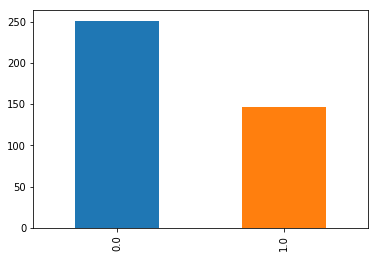

In [77]:
df.htn.value_counts().plot(kind = 'bar')

In [78]:
df.dm.describe()

count    398.000000
mean       0.344221
std        0.475712
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: dm, dtype: float64

In [79]:
df.dm.value_counts()

0.0    261
1.0    137
Name: dm, dtype: int64

261 individuals did not have Diabetes and 137 did.

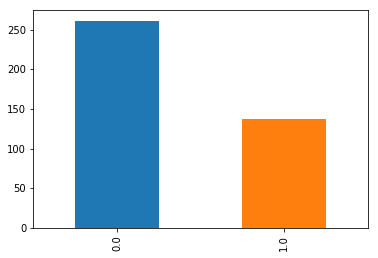

In [80]:
df.dm.value_counts().plot(kind = 'bar')

### Coronary Artery Disease feature

In [81]:
df.cad.describe()

count    398.000000
mean       0.085427
std        0.279868
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: cad, dtype: float64

In [82]:
df.cad.value_counts()

0.0    364
1.0     34
Name: cad, dtype: int64

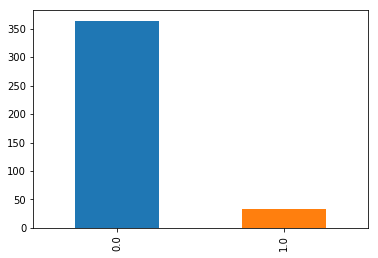

In [83]:
df.cad.value_counts().plot(kind = 'bar')

In [84]:
df.loc[df['cad'] == 1]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,...,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
12,68.0,70.0,1.015,3.0,1.0,NaN,0.0,1.0,0.0,208.0,...,28,12200,3.4,1.0,1.0,1.0,0.0,1.0,0.0,1.0
13,68.0,70.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,98.0,...,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,0.0,1.0
14,68.0,80.0,1.010,3.0,2.0,0.0,1.0,1.0,1.0,157.0,...,16,11000,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
18,60.0,100.0,1.025,0.0,3.0,NaN,0.0,0.0,0.0,263.0,...,37,11400,4.3,1.0,1.0,1.0,1.0,0.0,0.0,1.0
19,62.0,60.0,1.015,1.0,0.0,NaN,1.0,1.0,0.0,100.0,...,30,5300,3.7,1.0,0.0,1.0,1.0,0.0,0.0,1.0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
21,60.0,90.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,32,6200,3.6,1.0,1.0,1.0,1.0,0.0,0.0,1.0
27,69.0,70.0,1.010,3.0,4.0,0.0,1.0,0.0,0.0,264.0,...,37,9600,4.1,1.0,1.0,1.0,1.0,1.0,0.0,1.0
29,68.0,70.0,1.005,1.0,0.0,1.0,1.0,1.0,0.0,NaN,...,38,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0
54,63.0,80.0,1.010,2.0,2.0,0.0,NaN,0.0,0.0,NaN,...,40,9800,4.2,1.0,0.0,1.0,1.0,0.0,0.0,1.0


34 rows out of 400 have CAD, which is 8.5% of the sample group.  All the individuals that have CAD also have CKD.

### Appetite feature

In [85]:
df.appet.describe()

count    399.000000
mean       0.794486
std        0.404584
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: appet, dtype: float64

In [86]:
df.appet.value_counts()

1.0    317
0.0     82
Name: appet, dtype: int64

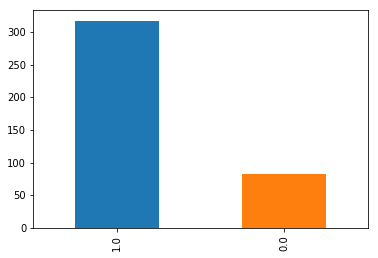

In [87]:
df.appet.value_counts().plot(kind = 'bar')

The late stages of chronic kideny disease are often associated with a poor appetite due to the accumulation of waste chemicals such as urea and creatinine in the blood.  In this dataset, most of the individuals had a good appetite.

### Pedal Edema feature

In [88]:
df.edema.describe()

count    399.000000
mean       0.190476
std        0.393170
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: edema, dtype: float64

In [89]:
df.edema.value_counts()

0.0    323
1.0     76
Name: edema, dtype: int64

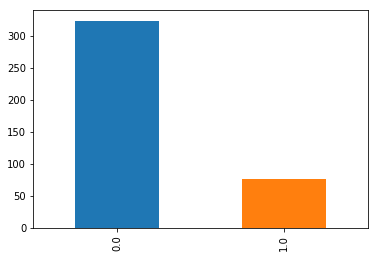

In [90]:
df.edema.value_counts().plot(kind = 'bar')

The later stages of CKD are often assoicated with swelling or edema in the feet and lower legs.  However, in this data set most of the individuals did not have this syptom.

### Dependent Variable - Classif

In [91]:
df.classif.describe()

count    400.000000
mean       0.625000
std        0.484729
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: classif, dtype: float64

In [92]:
df.classif.value_counts()

1.0    250
0.0    150
Name: classif, dtype: int64

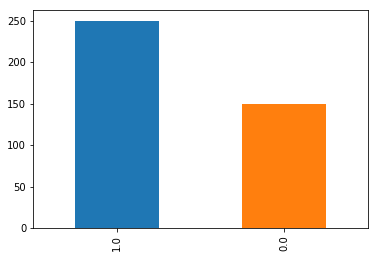

In [93]:
df.classif.value_counts().plot(kind = 'bar')

### Anemia Feature

Anemia is often diagnosed by a low hemaglobin.

In [94]:
df.anemia.describe()

count    399.000000
mean       0.150376
std        0.357888
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: anemia, dtype: float64

In [95]:
df.anemia.value_counts()

0.0    339
1.0     60
Name: anemia, dtype: int64

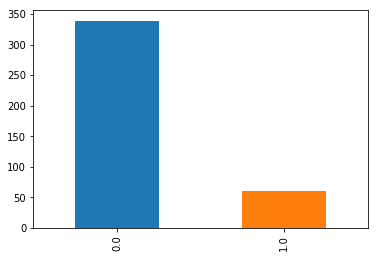

In [96]:
df.anemia.value_counts().plot(kind='bar')

Anemia is common in individuals with CKD due to the decrease secretion of erythropoetin by the kidneys.  A majority of the individuals did not have Anemia.

In [97]:
df.loc[df['anemia'] == 1]

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,...,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
8,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,...,33,9600,4,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29,12100,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
10,50.0,60.0,1.010,2.0,4.0,NaN,1.0,1.0,0.0,490.0,...,28,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,1.0
15,40.0,80.0,1.015,3.0,0.0,NaN,0.0,0.0,0.0,76.0,...,24,3800,2.8,1.0,0.0,0.0,1.0,0.0,1.0,1.0
20,61.0,80.0,1.015,2.0,0.0,1.0,1.0,0.0,0.0,173.0,...,24,9200,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
22,48.0,80.0,1.025,4.0,0.0,0.0,1.0,0.0,0.0,95.0,...,32,6900,3.4,1.0,0.0,0.0,1.0,0.0,1.0,1.0
23,21.0,70.0,1.010,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,61.0,60.0,1.025,0.0,0.0,NaN,0.0,0.0,0.0,108.0,...,29,8400,3.7,1.0,1.0,0.0,1.0,0.0,1.0,1.0


15% of the individuals in the dataset had anemia.  These people also had CKD which is common.

## Data Cleansing

## Missing Values

In [98]:
#Examine the number of missing values for each feature.
df.isnull().sum() 

age              9
bp              12
ua_spGr         47
ua_alb          46
ua_sug          49
ua_rbc         152
ua_pus          65
ua_pus_clum      4
ua_bact          4
gluc            44
bun             19
creat           17
Na              87
K               88
Hgb             52
pcv             71
wbc            106
rbc            131
htn              2
dm               2
cad              2
appet            1
edema            1
anemia           1
classif          0
dtype: int64

In [99]:
# to get percentage missing by DataFrame column code from
# McMaster (2017) at https://stackoverflow.com/questions/22257527/how-do-i-get-a-summary-count-of-missing-nan-data-by-column-in-pandas
df.isnull().sum()/len(df)*100

age             2.25
bp              3.00
ua_spGr        11.75
ua_alb         11.50
ua_sug         12.25
ua_rbc         38.00
ua_pus         16.25
ua_pus_clum     1.00
ua_bact         1.00
gluc           11.00
bun             4.75
creat           4.25
Na             21.75
K              22.00
Hgb            13.00
pcv            17.75
wbc            26.50
rbc            32.75
htn             0.50
dm              0.50
cad             0.50
appet           0.25
edema           0.25
anemia          0.25
classif         0.00
dtype: float64

In [100]:
df.shape[0] - df.dropna().shape[0] # to find the number of rows with missing data code from Edchum (2015)

242

In [101]:
df2 = df.dropna() # to find number of complete cases and remove all rows with NaN.

In [102]:
print(df2.shape) # to find number of complete cases

(158, 25)


In [103]:
# to check if all NaNs are removed
df2.isnull().sum() 

age            0
bp             0
ua_spGr        0
ua_alb         0
ua_sug         0
ua_rbc         0
ua_pus         0
ua_pus_clum    0
ua_bact        0
gluc           0
bun            0
creat          0
Na             0
K              0
Hgb            0
pcv            0
wbc            0
rbc            0
htn            0
dm             0
cad            0
appet          0
edema          0
anemia         0
classif        0
dtype: int64

All Nans are removed leaving 158 rows with completed cases.  

In [104]:
df2.classif.describe()

count    158.000000
mean       0.272152
std        0.446483
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: classif, dtype: float64

In [105]:
# examine the percent of class labels
df2.classif.value_counts()/len(df2)*100

0.0    72.78481
1.0    27.21519
Name: classif, dtype: float64

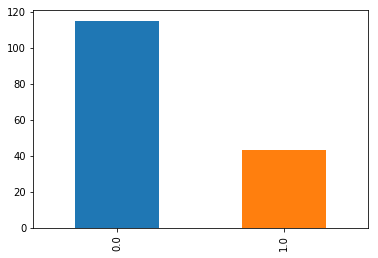

In [106]:
df2.classif.value_counts().plot(kind = 'bar')

In [107]:
df2.describe(include = 'all')

,age,bp,ua_spGr,ua_alb,ua_sug,ua_rbc,ua_pus,ua_pus_clum,ua_bact,gluc,...,pcv,wbc,rbc,htn,dm,cad,appet,edema,anemia,classif
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34,69,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52,6700,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,7,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.563291,74.050633,1.019873,0.797468,0.253165,0.113924,0.183544,0.088608,0.075949,131.341772,...,NaN,NaN,NaN,0.215190,0.177215,0.069620,0.879747,0.126582,0.101266,0.272152
std,15.512244,11.175381,0.005499,1.413130,0.813397,0.318729,0.388343,0.285080,0.265759,64.939832,...,NaN,NaN,NaN,0.412261,0.383065,0.255315,0.326292,0.333562,0.302640,0.446483
min,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,60.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,50.500000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.500000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,60.000000,80.000000,1.025000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,131.750000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000


### Correlations df2 (complete cases only)

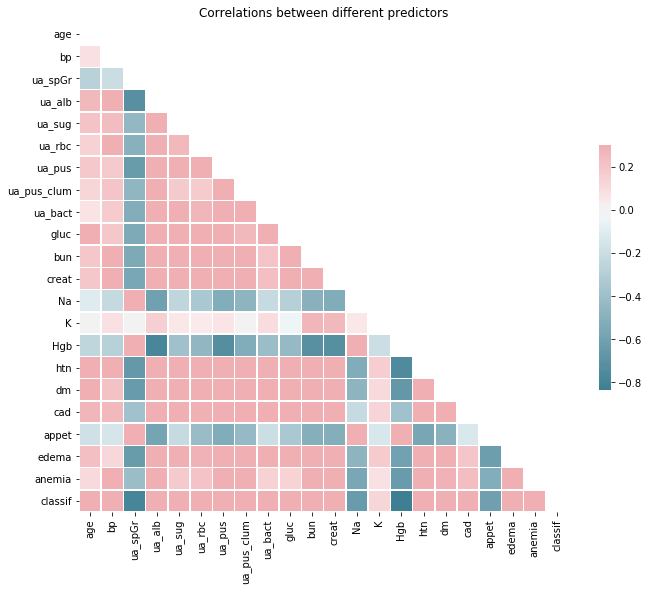

In [108]:
# code from Myna (2017) https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/data
corr_df = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

The above chart shows that the features with the highest correlation values are ua_spGr, Na, Hgb,and appet.

### Train and Test set

In [109]:
# code from Myna (2017) https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/data
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2['classif'], 
                                                    test_size = 0.33, random_state=44,
                                                   stratify= df2['classif'] )

In [110]:
print(X_train.shape)

(105, 24)


In [111]:
print(X_test.shape)

(53, 24)


In [112]:
print(y_train.shape)

(105,)


In [113]:
print(y_test.shape)

(53,)


In [114]:
y_train.value_counts()

0.0    76
1.0    29
Name: classif, dtype: int64

In [115]:
# examine the percent of class labels for y train set.
y_train.value_counts()/len(y_train)*100

0.0    72.380952
1.0    27.619048
Name: classif, dtype: float64

The above counts are similar to the df2 dataset.

### Run Random Forest on df2

In [116]:
#instantiates the model
clf = RandomForestClassifier(random_state = 22)

In [117]:
# fit the model on training data
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=22, verbose=0, warm_start=False)

In [118]:
# predict on new data, code adopted from VanderPlas (2017), Chapter 5 page 351.
y_clf = clf.predict(X_test)

In [119]:
# code from VanderPlas (2017)  (p. 352)
accuracy_score( y_test, y_clf)

1.0

In [120]:
# score on testing data code from Gluck (2017)
clf.score(X_test, y_test)

1.0

In [121]:
# code from Myna (2017)
print("Detailed classification report RF:")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Detailed classification report RF:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        39
        1.0       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        53



Print confusion matrix

In [122]:
# code from Myna (2017) https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/data
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[39  0]
 [ 0 14]]


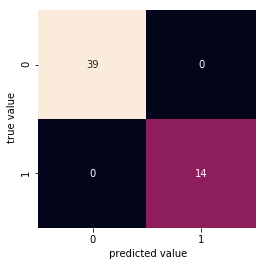

In [123]:
# visualize confusion matrix with heatmap
# mat = confusion_matrix( ytest, y_model) 

sns.heatmap( confusion, square = True, annot = True, cbar = False) 
plt.xlabel(' predicted value') 
plt.ylabel(' true value');

# VanderPlas, Jake. Python Data Science Handbook: Essential Tools for Working with Data (p. 357). O'Reilly Media. Kindle Edition. 

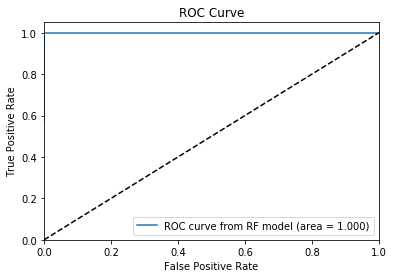

In [124]:
# If accuracy score not equal to one then determine the false positive and true positive rates, code from Myna (2017)
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

# print('Best parameters:') did not include Myna's (2017) code for search grid
# print(clf.best_params_)
# clf_best = model.best_estimator_


### Validate Model Performance with CV

In [125]:
# VanderPlas (2017) (p. 362).
from sklearn.cross_validation import cross_val_score

In [126]:
# validate the model's performance with cross validation module in Scikit-Learn.  Code from VanderPlas (2017) (p. 362). 
cross_val_score( clf, X_test, y_test, cv = 5)

array([1., 1., 1., 1., 1.])

The cross validation process confirms initial accuracy score of 100%.

### Feature Importance

In [127]:
# check feature importance for clf code from Gluck (2017)
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

             importance
rbc            0.185719
ua_spGr        0.157570
Hgb            0.126237
creat          0.116827
ua_alb         0.113034
ua_pus         0.067593
pcv            0.067506
gluc           0.060467
htn            0.056452
Na             0.043548
bun            0.005048
wbc            0.000000
edema          0.000000
appet          0.000000
cad            0.000000
dm             0.000000
age            0.000000
K              0.000000
bp             0.000000
ua_bact        0.000000
ua_pus_clum    0.000000
ua_rbc         0.000000
ua_sug         0.000000
anemia         0.000000


The top three features for this data set is rbc, urine specific gravity and hemoglobin.

### SVM

The next step was to compare the accuracy of the Random Forest to an SVM model on the first data set.

In [128]:
from sklearn import svm

In [129]:
svmdf2 = svm.SVC()

In [130]:
svmdf2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [131]:
# predict on new data, code adopted from VanderPlas (2017), Chapter 5 page 351.
y_svm = svmdf2.predict(X_test)

In [132]:
# VanderPlas (2017)  (p. 352) 
accuracy_score( y_test, y_svm)

0.7358490566037735

In [133]:
# code from Myna (2017)
print("Detailed classification report SVM:")
y_true, y_pred = y_test, svmdf2.predict(X_test)
print(classification_report(y_true, y_pred))

Detailed classification report SVM:
             precision    recall  f1-score   support

        0.0       0.74      1.00      0.85        39
        1.0       0.00      0.00      0.00        14

avg / total       0.54      0.74      0.62        53



In [134]:
# code from Myna (2017) https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/data
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix SVM:')
print(confusion)

Confusion Matrix SVM:
[[39  0]
 [14  0]]


The above confusion matrix shows that the SVM misclassified all of the class ones (postive for CKD) cases as zeros (not CKD).

### Create New Dataframe with more samples and less features

The next step was to create a dataframe with more samples to see how the above models would perform.  I used the technique to drop the columns with greater than 15% NaNs as described by Aqlan, Markle and Shamsan (2017).  However, due to time and inexperience I chose to impute the remaining missing values with the mode since most of the remaining features were categorical.  However, I think that imputing the numerical values with the mean instead of the mode would be more accurate.

### Missing Values for second dataset

In [135]:
# drop columns with > 15% NaNs code from pandas.Datafram.drop at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
df3 = df.drop(columns=['ua_rbc', 'ua_pus', 'Na', 'K', 'pcv', 'wbc', 'rbc'])
df3. shape

(400, 18)

In [136]:
df3.head()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_pus_clum,ua_bact,gluc,bun,creat,Hgb,htn,dm,cad,appet,edema,anemia,classif
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,121.0,36.0,1.2,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,NaN,18.0,0.8,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,423.0,53.0,1.8,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,117.0,56.0,3.8,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,106.0,26.0,1.4,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [137]:
df3.isnull().sum() 

age             9
bp             12
ua_spGr        47
ua_alb         46
ua_sug         49
ua_pus_clum     4
ua_bact         4
gluc           44
bun            19
creat          17
Hgb            52
htn             2
dm              2
cad             2
appet           1
edema           1
anemia          1
classif         0
dtype: int64

The list above shows the features and the count of Nans.  There are no missing values in the dependent variable "classif"

In [138]:
df3

,age,bp,ua_spGr,ua_alb,ua_sug,ua_pus_clum,ua_bact,gluc,bun,creat,Hgb,htn,dm,cad,appet,edema,anemia,classif
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,121.0,36.0,1.20,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,NaN,18.0,0.80,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,423.0,53.0,1.80,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,117.0,56.0,3.80,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,106.0,26.0,1.40,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,0.0,0.0,74.0,25.0,1.10,12.2,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,0.0,0.0,100.0,54.0,24.00,12.4,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24.0,NaN,1.015,2.0,4.0,0.0,0.0,410.0,31.0,1.10,12.4,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,138.0,60.0,1.90,10.8,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,0.0,70.0,107.0,7.20,9.5,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [139]:
df3.mode()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_pus_clum,ua_bact,gluc,bun,creat,Hgb,htn,dm,cad,appet,edema,anemia,classif
0,60.0,80.0,1.02,0.0,0.0,0.0,0.0,99.0,46.0,1.2,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [140]:
# Fill in the NaNs with the mode for each column.  code taken from hellpanderr (2015) at https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas
df3_imp = df3.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [141]:
df3_imp

,age,bp,ua_spGr,ua_alb,ua_sug,ua_pus_clum,ua_bact,gluc,bun,creat,Hgb,htn,dm,cad,appet,edema,anemia,classif
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,121.0,36.0,1.20,15.4,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,99.0,18.0,0.80,11.3,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,423.0,53.0,1.80,9.6,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,117.0,56.0,3.80,11.2,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,106.0,26.0,1.40,11.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,60.0,90.0,1.015,3.0,0.0,0.0,0.0,74.0,25.0,1.10,12.2,1.0,1.0,0.0,1.0,1.0,0.0,1.0
6,68.0,70.0,1.010,0.0,0.0,0.0,0.0,100.0,54.0,24.00,12.4,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,24.0,80.0,1.015,2.0,4.0,0.0,0.0,410.0,31.0,1.10,12.4,0.0,1.0,0.0,1.0,1.0,0.0,1.0
8,52.0,100.0,1.015,3.0,0.0,1.0,0.0,138.0,60.0,1.90,10.8,1.0,1.0,0.0,1.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,1.0,0.0,70.0,107.0,7.20,9.5,1.0,1.0,0.0,0.0,0.0,1.0,1.0


In [142]:
df3.describe()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_pus_clum,ua_bact,gluc,bun,creat,Hgb,htn,dm,cad,appet,edema,anemia,classif
count,391.000000,388.000000,353.000000,354.000000,351.000000,396.000000,396.000000,356.000000,381.000000,383.000000,348.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.106061,0.055556,148.036517,57.425722,3.072454,12.526437,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.308305,0.229351,79.281714,50.503006,5.741126,2.912587,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,10.300000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,12.650000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,15.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,490.000000,391.000000,76.000000,17.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
# check that there are no NaNs in df3 dataset
df3_imp.isnull().sum() 

age            0
bp             0
ua_spGr        0
ua_alb         0
ua_sug         0
ua_pus_clum    0
ua_bact        0
gluc           0
bun            0
creat          0
Hgb            0
htn            0
dm             0
cad            0
appet          0
edema          0
anemia         0
classif        0
dtype: int64

In [144]:
# find the mode for each feature for after imputation
df3_imp.mode()

,age,bp,ua_spGr,ua_alb,ua_sug,ua_pus_clum,ua_bact,gluc,bun,creat,Hgb,htn,dm,cad,appet,edema,anemia,classif
0,60.0,80.0,1.02,0.0,0.0,0.0,0.0,99.0,46.0,1.2,15.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [145]:
df3_imp.shape

(400, 18)

### Correlation Between features of DF3_imp

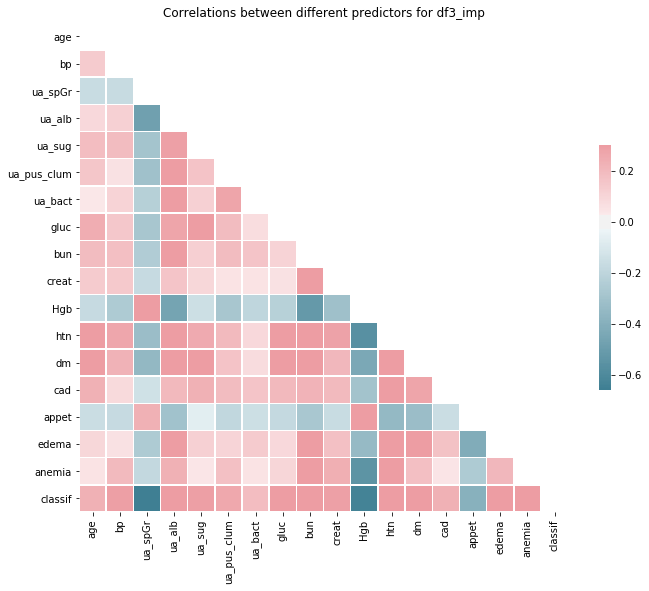

In [146]:
# code from Myna (2017) https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/data
corr_df3 = df3_imp.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df3, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors for df3_imp')
plt.show()

### Train and Test set on df3_imp

In [147]:
# code from Myna (2017) https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/data
X_train, X_test, y_train, y_test = train_test_split(df3_imp.iloc[:,:-1], df3_imp['classif'], 
                                                    test_size = 0.33, random_state=44,
                                                   stratify= df3_imp['classif'] )

In [148]:
print(X_train.shape)

(268, 17)


In [149]:
print(X_test.shape)

(132, 17)


In [150]:
print(y_train.shape)

(268,)


In [151]:
print(y_test.shape)

(132,)


In [152]:
y_train.value_counts()

1.0    168
0.0    100
Name: classif, dtype: int64

In [153]:
# examine the percent of class labels for y train set.
y_train.value_counts()/len(y_train)*100

1.0    62.686567
0.0    37.313433
Name: classif, dtype: float64

### Run Random Forest on df3_imp

In [154]:
clf2 = RandomForestClassifier(random_state = 22)

In [155]:
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=22, verbose=0, warm_start=False)

In [156]:
# predict on new data, code adopted from VanderPlas (2017), Chapter 5 page 351.
y_clf2 = clf2.predict(X_test)

In [157]:
accuracy_score( y_test, y_clf2)
# VanderPlas, Jake. Python Data Science Handbook: Essential Tools for Working with Data (p. 352). O'Reilly Media. Kindle Edition. 

1.0

The above accuracy score is 100%. 

Print a detailed classification report

In [158]:
# code from Myna (2017) https://www.kaggle.com/csyhuang/predicting-chronic-kidney-disease/data
print("Detailed classification report 2:")
y_true, y_pred = y_test, clf2.predict(X_test)
print(classification_report(y_true, y_pred))


Detailed classification report 2:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        50
        1.0       1.00      1.00      1.00        82

avg / total       1.00      1.00      1.00       132



In [159]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)


Confusion Matrix:
[[50  0]
 [ 0 82]]


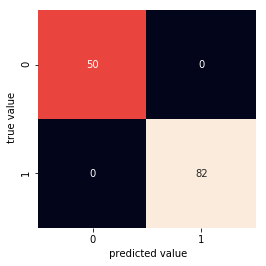

In [160]:
# visualize confusion matrix with heatmap, code from # VanderPlas (2017) (p. 357).
# mat = confusion_matrix( ytest, y_model) 

sns.heatmap( confusion, square = True, annot = True, cbar = False) 
plt.xlabel(' predicted value') 
plt.ylabel(' true value');

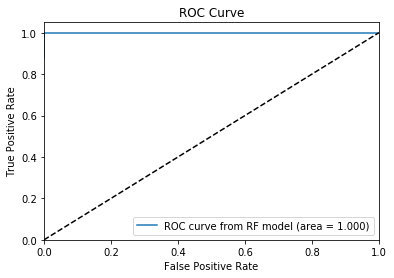

In [161]:
# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf2, X_test, y_test, 'RF')

# print('Best parameters:') did not include Myna's (2017) code for search grid
# print(clf.best_params_)
# clf_best = clf.best_estimator_

### Validate clf2 Model Performance with CV

In [162]:
# validate the model's performance with cross validation module in Scikit-Learn.  Code from VanderPlas (2017) (p. 362).  
cross_val_score( clf2, X_test, y_test, cv = 5)

array([0.96296296, 1.        , 1.        , 1.        , 1.        ])

In [163]:
# validate the model's performance on train sample with cross validation module in Scikit-Learn.  Code from VanderPlas (2017) (p. 362).  
cross_val_score( clf2, X_train, y_train, cv = 5)

array([0.96296296, 0.98148148, 0.98148148, 1.        , 1.        ])

In [164]:
# check feature importance for clf2 code from Gluck (2017) 
feature_importances = pd.DataFrame(clf2.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

             importance
creat          0.282257
Hgb            0.218041
ua_spGr        0.105057
ua_alb         0.100787
dm             0.092555
edema          0.043577
bun            0.034268
htn            0.034154
age            0.028407
gluc           0.025342
appet          0.017944
ua_sug         0.011951
bp             0.005661
ua_bact        0.000000
ua_pus_clum    0.000000
cad            0.000000
anemia         0.000000


The top three features for this data set are creatinine, serum hemoglobin and urine specific gravity.  In both data sets the features Hgb (serum hemoglobin) and ua_spGr (urine specific gravity) were in the top 3 important features.

### SVM on second data set df3

In [165]:
svmdf3 = svm.SVC()

In [166]:
svmdf3.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [167]:
# predict on new data, code adopted from VanderPlas (2017), Chapter 5 page 351.
y_svm3 = svmdf3.predict(X_test)

In [168]:
accuracy_score( y_test, y_svm3)
# VanderPlas (2017)  (p. 352) 

0.6287878787878788

In [169]:
# code from Myna (2017)
print("Detailed classification report SVM:")
y_true, y_pred = y_test, svmdf3.predict(X_test)
print(classification_report(y_true, y_pred))

Detailed classification report SVM:
             precision    recall  f1-score   support

        0.0       1.00      0.02      0.04        50
        1.0       0.63      1.00      0.77        82

avg / total       0.77      0.63      0.49       132



In [170]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)


Confusion Matrix:
[[ 1 49]
 [ 0 82]]


The confusion matrix above shows that the SVM on df3 (larger samples, less features) misclassified 49 class zero (no CKD) as having CKD for 63% accuracy score.

Validate SVM model performance with CV

In [171]:
# validate the model's performance with cross validation module in Scikit-Learn.  Code from VanderPlas (2017) (p. 362).  
cross_val_score( svmdf3, X_test, y_test, cv = 5)

array([0.59259259, 0.62962963, 0.61538462, 0.61538462, 0.61538462])

### Discussion

Accuracy Score by Model and Data Set

| Data | SVM | RF |
|:---|:---:|:---:|
| df2 (158 samples, 24 features) | 73% | 100% |
| df3 (400 samples, 17 features)| 63% | 100% |


The Random Forest Classification model on both data sets yielded an accuracy score of 100%,  which is similar to the  result achieved by Aqlan, Markle and Shamsan (2017) although their data set was constructed in a different manner. 

The SVM models in this project had inferior results as compared to the Random Forest models.  The SVM on the first data set (158 samples, 24 features) had a 73% accuracy score vs. 63% accuracy score on the second data set (400 samples, 17 features).  Aqlan, Markle and Shamsan (2017) were able to achieve 98% accuracy for their SVM model on 320 samples.

# References

Aqlan, F., Markle, R., and Shamsan, A. (2017).  Data Mining for Chronic Kidney Disease Prediction.  Proceedings of the 2017 Industrial and Systems Engineering Conference.  Retrieved on 7/14/18 from https://www.researchgate.net/publication/317231517_Data_Mining_for_Chronic_Kidney_Disease_Prediction

Blood urea nitrogen (BUN) test (n.d.)  Retrieved on 7/23/18 from Mayo Clinic at https://www.mayoclinic.org/tests-procedures/blood-urea-nitrogen/about/pac-20384821

Edchum (2015) Best way to count the number of rows with missing values in a pandas DataFrame. Retrieved on 7/18/18 at http://localhost:8888/notebooks/OneDrive/Practicum%202%20MSDS%20696/Practicum2Project.ipynb#

Ghadban, R. (2014) Specifiy gravity.  Retrieved on 7/22/18 from Medscape at https://emedicine.medscape.com/article/2090711-overview#a4

Gluck, C. (2017) Running Random Forests?  Inspect the feature importances with this code.  Retrieved on 8/3/18 at https://towardsdatascience.com/running-random-forests-inspect-the-feature-importances-with-this-code-2b00dd72b92e

hellpanderr (2015) Imputation of missing values for categories in pandas/  Retrieved on 7/29/18 from https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas

Hematocrit (2018). Retrieved from Wikipedia on 7/25/18 from https://en.wikipedia.org/wiki/Hematocrit

Hemoglobin test (2018) Mayo Clinic Retrieved on 7/23/18 from https://www.mayoclinic.org/tests-procedures/hemoglobin-test/about/pac-20385075

McKinney, W. (2012) Stackoverflow. Pandas dataframe: remove unwanted parts from strings in a column retrieved on 7/26/18 from https://stackoverflow.com/questions/13682044/pandas-dataframe-remove-unwanted-parts-from-strings-in-a-column

Rood, E. (2018)  Select rows from a pandas dataframe based on values in a column.  Retrieved on 7/11/18 at https://erikrood.com/Python_References/rows_cols_python.html

Urine specific gravity (2018) Retrieved on 7/22/18 at https://en.wikipedia.org/wiki/Urine_specific_gravity

VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media. Kindle Edition.